<a href="https://colab.research.google.com/github/LokeshVadlamudi/BeautifulSoup/blob/master/Assignment_2/Assignment_2_part1/assignment2_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The gradient tape helps us to do differentiation , in the example below, the x**3 becomes 3x**2, when 4 is passed, 48 is sent out as result.

In [1]:
import tensorflow as tf

x = tf.constant(4.0)
with tf.GradientTape() as tape:
    tape.watch(x)
    y = x**3

print(tape.gradient(y, x).numpy()) # -> 48

48.0


#lets import necessary libraries

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

#lets generate 5000 samples

In [3]:
samples = 5000

#negative data
negative_data = np.random.multivariate_normal(mean=[0, 3], cov=[[1, 0.5], [0.5, 1]], size=samples)

#positive data
positive_data = np.random.multivariate_normal(mean=[3, 0], cov=[[1, 0.5], [0.5, 1]], size=samples)

#plotting negative and positive examples we generated

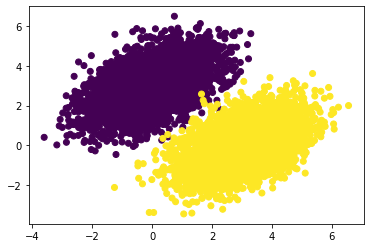

In [5]:
features = np.vstack((negative_data, positive_data)).astype(np.float32)
labels = np.vstack((np.zeros((samples, 1), dtype='float32'),np.ones((samples, 1), dtype='float32')))

plt.scatter(features[:, 0], features[:, 1], c=labels[:, 0])

In [8]:
#input dimension
input_dim = 2

#output dimension
output_dim = 1

#lets set the learning rate
learning_rate = 0.01

# let set the weight matrix
w = tf.Variable(tf.random.uniform(shape=(input_dim, output_dim)))

# lets set the bias vector
b = tf.Variable(tf.zeros(shape=(output_dim,)))

#computing predictions
def compute_predictions(features):
  return tf.matmul(features, w) + b

#computing the loss based on predictions and actual labels
def compute_loss(labels, predictions):
  return tf.reduce_mean(tf.square(labels - predictions))

#training data based on batches with the help of gradient tape to differentiate.
def train_on_batch(x, y):
  with tf.GradientTape() as tape:
    predictions = compute_predictions(x)
    loss = compute_loss(y, predictions)
    dloss_dw, dloss_db = tape.gradient(loss, [w, b])
  w.assign_sub(learning_rate * dloss_dw)
  b.assign_sub(learning_rate * dloss_db)
  return loss

In [9]:
# now lets make data to shuffle.
indices = np.random.permutation(len(features))
features = features[indices]
labels = labels[indices]

# lets generate dataset for batch iterations.
dataset = tf.data.Dataset.from_tensor_slices((features, labels))
dataset = dataset.shuffle(buffer_size=1024).batch(256)

#training for 10 epochs
for epoch in range(10):
  for step, (x, y) in enumerate(dataset):
    loss = train_on_batch(x, y)
  print('Epoch %d: last batch loss = %.4f' % (epoch, float(loss)))

Epoch 0: last batch loss = 0.0750
Epoch 1: last batch loss = 0.0747
Epoch 2: last batch loss = 0.0240
Epoch 3: last batch loss = 0.0583
Epoch 4: last batch loss = 0.0730
Epoch 5: last batch loss = 0.0272
Epoch 6: last batch loss = 0.0405
Epoch 7: last batch loss = 0.0154
Epoch 8: last batch loss = 0.0164
Epoch 9: last batch loss = 0.0431


#now that we trained the model, lets compute the predictions.

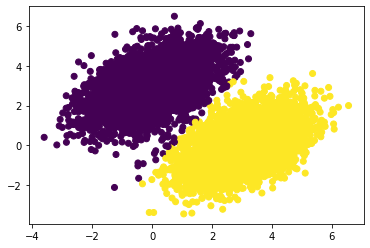

In [10]:
predictions = compute_predictions(features)
plt.scatter(features[:, 0], features[:, 1], c=predictions[:, 0] > 0.5)